In [31]:
!pip install scikit-image

<class 'numpy.ndarray'>
(512, 512)


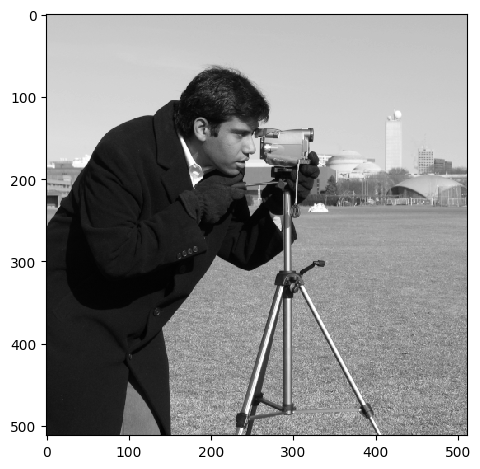

In [32]:
#Cargar y visualizar imagen

import skimage

#Carga imagen de skimage.data
camera = skimage.data.camera()
#explora imagen
print(type(camera))
print(camera.shape)
#Mostra la imagen
skimage.io.imshow(camera)
skimage.io.show()

<class 'numpy.ndarray'>
(512, 512, 3)


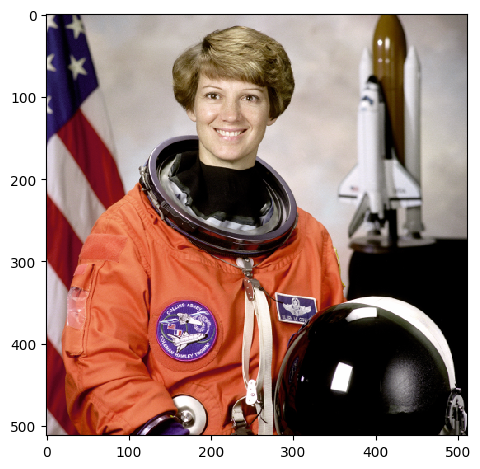

In [33]:
#Carga imagen de Skimage.data
astronaut = skimage.data.astronaut()
#explora imagen
print(type(astronaut))
print(astronaut.shape)
#Mostra la imagen
skimage.io.imshow(astronaut)
skimage.io.show()

<class 'numpy.ndarray'>
(160, 257, 3)


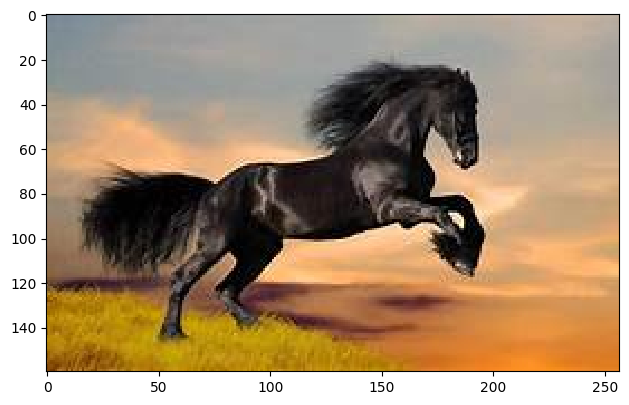

In [34]:
#Carga una imagen almacenada
import skimage

#Ruta de la imagen
image_path ='horse.jpeg'

#Carga imagen
image = skimage.io.imread(image_path)
#explora imagen
print(type(image))
print(image.shape)
#Mostra la imagen
skimage.io.imshow(image)
#skimage.io.show

In [35]:
#Obtener dimensiones de la imagen
height, width = image.shape[:2]

#Calcular el centro de la imagen
center_x = (width /2, height /2)

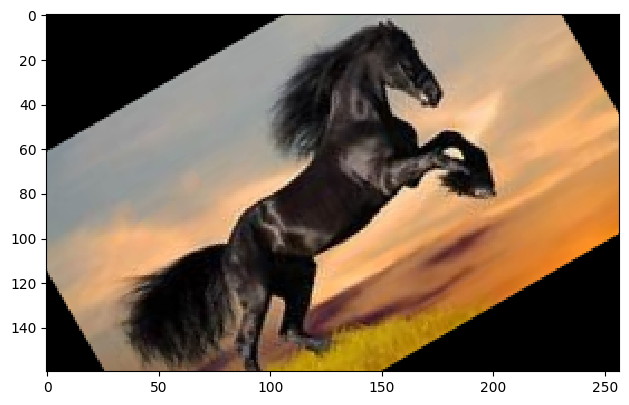

In [36]:
#Rotar la imagen 30 grados en sentido antihorario
rotated_image = skimage.transform.rotate(image, 30)
#Mostra la imagen
skimage.io.imshow(rotated_image)
skimage.io.show()

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


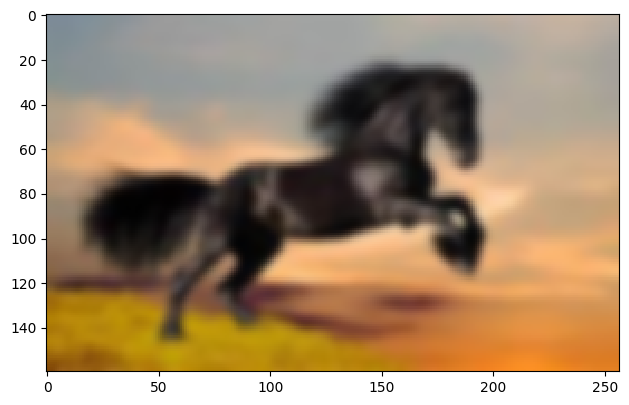

In [37]:
#Aplicar un filtro Gaussiano para visualizar la imagen
smoothed_image = skimage.filters.gaussian(image, sigma=2)
#Mostra la imagen
skimage.io.imshow(smoothed_image)
skimage.io.show()

Forma de la imagen: (160, 257, 3)
Tipo de datos de la imagen: uint8


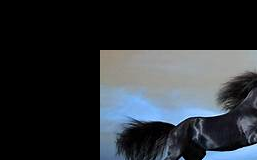

In [38]:
#Traslación

import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab

#Definir la matriz de traslación
tx,ty = 100, 50
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Verificar el formato de la imagen
print(f"Forma de la imagen: {image.shape}")
print(f"Tipo de datos de la imagen: {image.dtype}")


#Aplicar la traslación a la imagen
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

#Mostrar la imagen traslapada
cv2_imshow(translated_image) # Use cv2_imshow instead of cv2.imshow
# cv2.waitKey(0)  # These lines are not needed with cv2_imshow
# cv2.destroyAllWindows()

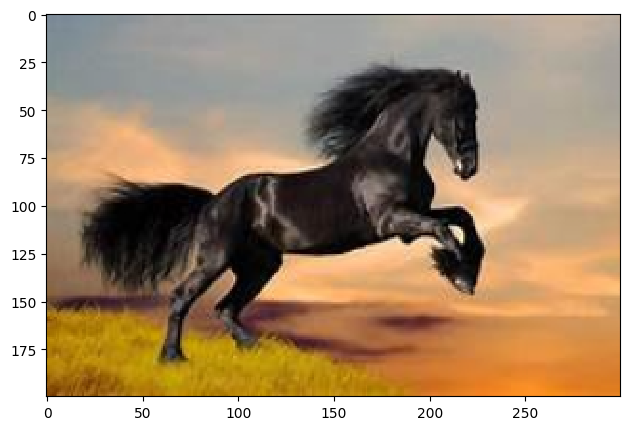

In [39]:
#Transformación geométrica

#Definir el nuevo ancho y alto
new_width = 300
new_height = 200

#Aplicar la escala a la imagen
scaled_image = skimage.transform.resize(image, (new_height, new_width))

#Mostra la imagen
skimage.io.imshow(scaled_image)
skimage.io.show()

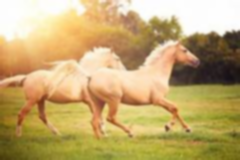

In [40]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Filtrado de imagenes
image = cv2.imread('horse1.jpeg')

#Aplicar filtro Gaussiano para suavizar la imagen
smoothed = cv2.GaussianBlur(image, (5,5),0)

#Mostrar la imagen suavizada
cv2_imshow(smoothed)
#cv2.imshow('Suavizado', smoothed)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

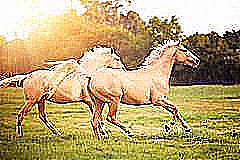

<function destroyAllWindows>

In [41]:
#Filtrado de imagenes
#Realce

#Definir el kernel para el filtrado de afilado
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

#Aplicar el filtro de afilado para realzar los detalles
sharpened = cv2.filter2D(image, -1, kernel)

#Mostrar la imagen realzada
cv2_imshow(sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows

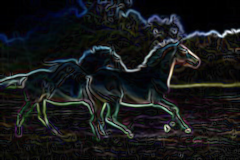

In [42]:
#Detección de bordes

#Aplicar el operador Sobel para detectar bordes
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
Sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

#combinar las respuestas en magnitud
edges = cv2.magnitude(sobelx, Sobely)

#Normalizar los valores para mostrar la imagen correctamente
edges = cv2.normalize(edges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#Mostrar la imagen de bordes
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
(160, 241, 3)


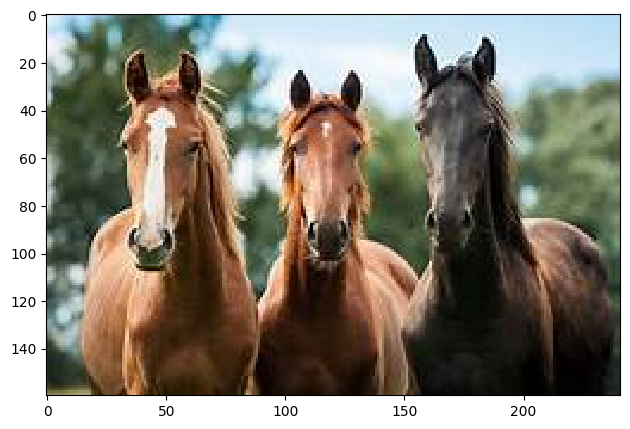

In [43]:
import cv2
from google.colab.patches import cv2_imshow
#Carga una imagen almacenada
import skimage

#Ruta de la imagen
image_path_2 ='horses.jpeg'

#Carga imagen
image_horses = skimage.io.imread(image_path_2)

# Verificar si la imagen se cargó correctamente
if image_horses is None:
    print(f"Error: La imagen en la ruta '{image_path_2}' no se pudo cargar.")
else:
    #explora imagen
    print(type(image_horses))
    print(image_horses.shape)
    #Mostra la imagen
    skimage.io.imshow(image_horses)
    #skimage.io.show

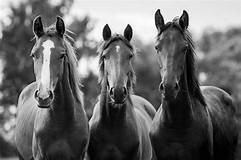

In [44]:
# Convertir a escala de grises
gray = cv2.cvtColor(image_horses, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
cv2_imshow(gray)

()


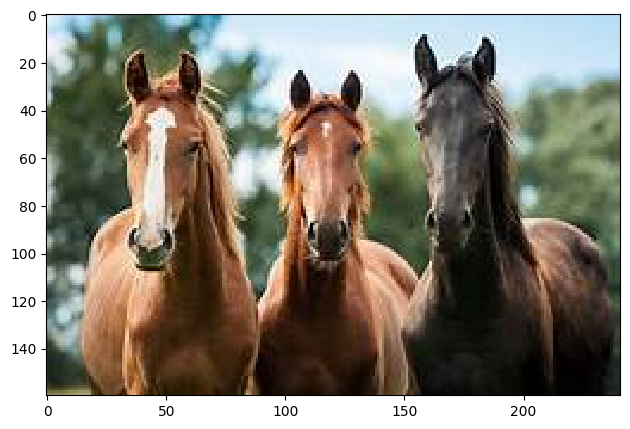

In [45]:
#Detección de rostro de horses
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

faces = faceClassif.detectMultiScale(gray,
   scaleFactor=1.1,
   minNeighbors=5,
   minSize=(30,30),
   maxSize=(200,200))
print(faces)

# Dibujar rectángulos alrededor de los rostros detectados
for (x, y, w, h) in faces:
    cv2.rectangle(image_horses, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar la imagen con los rostros detectados
skimage.io.imshow(image_horses)
cv2.waitKey(0)
cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(160, 256, 3)


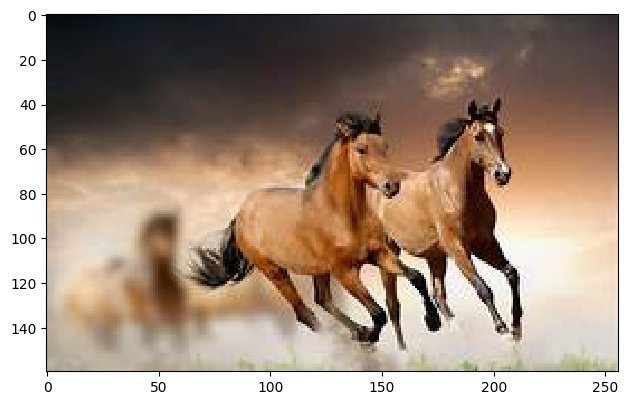

In [46]:
import cv2
from google.colab.patches import cv2_imshow
#Carga una imagen almacenada
import skimage

#Ruta de la imagen
image_path_3 ='horses1.jpeg'

#Carga imagen
image_horses_2 = skimage.io.imread(image_path_3)

# Verificar si la imagen se cargó correctamente
if image_horses_2 is None:
    print(f"Error: La imagen en la ruta '{image_path_3}' no se pudo cargar.")
else:
    #explora imagen
    print(type(image_horses_2))
    print(image_horses_2.shape)
    #Mostra la imagen
    skimage.io.imshow(image_horses_2)
    #skimage.io.show

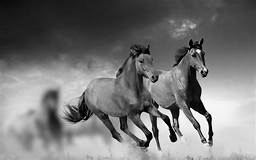

In [47]:
# Convertir a escala de grises
gray_2 = cv2.cvtColor(image_horses_2, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
cv2_imshow(gray_2)

()


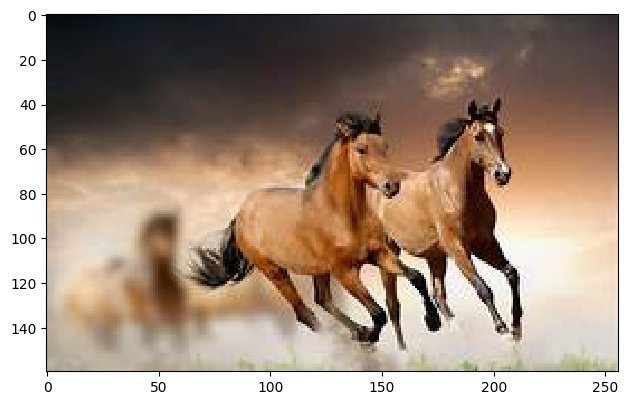

In [48]:
#Detección de rostro de horses
faceClassif_2 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface.xml')

faces_2 = faceClassif_2.detectMultiScale(gray_2,
   scaleFactor=1.1,
   minNeighbors=5,
   minSize=(30,30),
   maxSize=(200,200))
print(faces_2)

# Dibujar rectángulos alrededor de los rostros detectados
for (x, y, w, h) in faces_2:
    cv2.rectangle(image_horses_2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar la imagen con los rostros detectados
skimage.io.imshow(image_horses_2)
cv2.waitKey(0)
cv2.destroyAllWindows()
